# Test di ipotesi

Innanzitutto, supponiamo che una variabile casuale $x$ possa essere distribuita secondo una di due possibili PDF:

* $f_0(x)$ se è vera l'ipotesi che chiamiamo $H_0$
* $f_1(x)$ se è vera l'ipotesi che chiamiamo $H_1$

Immaginando di avere una sola osservazione $x=x_{\mathrm{obs}}$, il *test di ipotesi* mira a dare indicazione su quale delle due ipotesi sia favorita dall'osservazione di $x=x_{\mathrm{obs}}$

Indicheremo le due PDF come:

* $f(x|H_0)$
* $f(x|H_1)$

Un modo per determinare quale delle due ipotesi sia favorita potrebbe essere stabilire un valore di soglia $x_{\mathrm{cut}}$.

* se $x_{\mathrm{obs}}<x_{\mathrm{cut}}$ scegliamo $H_0$
* se $x_{\mathrm{obs}}\ge x_{\mathrm{cut}}$ scegliamo $H_1$

Il valore osservato $x_{\mathrm{obs}}$ viene detto in letteratura *test statistic*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

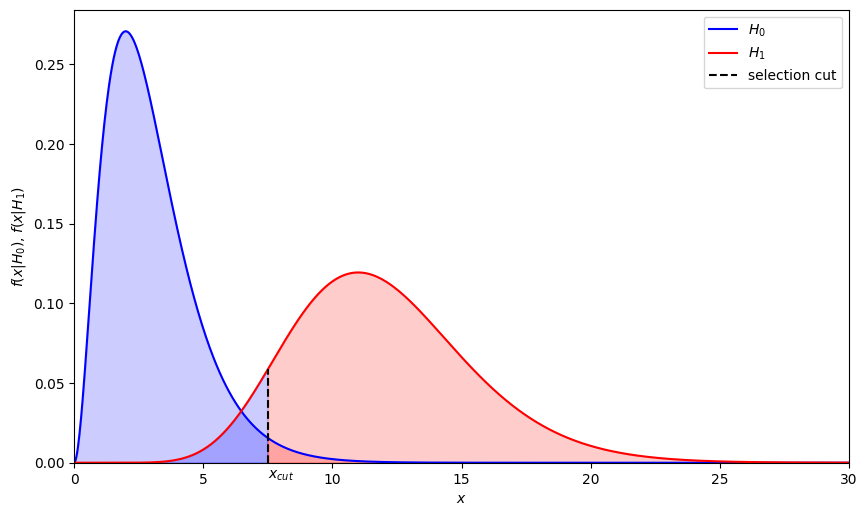

In [2]:
plt.figure(figsize=(10,6),dpi=100)
pdf_0 = gamma(3)
pdf_1 = gamma(12)
xrange=(0,30)
x = np.linspace(*xrange,1000)
x_cut = 7.5
y_cut = max(pdf_0.pdf(x_cut),pdf_1.pdf(x_cut))
plt.plot(x,pdf_0.pdf(x), color='b', label='$H_0$')
plt.plot(x,pdf_1.pdf(x), color='r', label='$H_1$')
plt.plot([x_cut,x_cut],[0,y_cut], color='black', linestyle='--', label='selection cut')
x_lo = x[x<x_cut]
x_hi = x[x>=x_cut]
plt.fill_between(x_lo,pdf_0.pdf(x_lo), color='b', alpha=0.2)
plt.fill_between(x_lo,pdf_1.pdf(x_lo), color='b', alpha=0.2)
plt.fill_between(x_hi,pdf_0.pdf(x_hi), color='r', alpha=0.2)
plt.fill_between(x_hi,pdf_1.pdf(x_hi), color='r', alpha=0.2)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x|H_0)$, $f(x|H_1)$')
plt.text(x_cut, -0.01, '$x_{cut}$')
plt.xlim(*xrange)
plt.ylim(0)
plt.show()

In problemi di fisica, spesso parlaimo di *selezione*, e il valore di soglia $x_{\mathrm{cut}}$ viene in gergo chiamato *taglio* applicato sulla variabile $x$.

## Risultati del test ed errori

Nella figura sopra, le distribuzioni $f(x|H_0)$ e $f(x|H_1)$ appaiono abbastanza separate, ma non del tutto.

Se è vera $H_0$ (detta anche **ipotesi nulla**), il criterio $x_{\mathrm{obs}}<x_{\mathrm{cut}}$ selezionerà la maggior parte dei valori, ma escluderà i casi in cui $x_{\mathrm{obs}}\ge x_{\mathrm{cut}}$, che si trovano nella *coda* destra della distribuzione, corrispondenti ad una probabilità:

$\displaystyle \alpha = \int_{x_{\mathrm{cut}}}^{+\infty}\!\!\!\!\!f(x|H_0)\,\mathrm{d}x$

*Escludere l'ipotesi $H_0$* quando questa è vera, viene detto **errore del I tipo**, e $\alpha$ prende il nome di **livello di significatività**. Si trattta, in questo caso, di un **falso positivo**.

Se è vera, viceversa, $H_1$, il criterio $x_{\mathrm{obs}}<x_{\mathrm{cut}}$ selezionerà solo i casi che si trovano nella *coda* sinistra della distribuzione, corrispondenti ad una probabilità:

$\displaystyle \beta = \int^{x_{\mathrm{cut}}}_{-\infty}\!\!\!\!\!f(x|H_1)\,\mathrm{d}x$

*Escludere l'ipotesi $H_1$* quando questa è vera, viene detto **errore del II tipo**. Si tratta, in questo caso, di un **falso negativo**.

<span style="color:blue">Nei problemi di fisica in cui la selezione mira a separare un *segnale* ($H_1$) da un *fondo* ($H_0$), $\alpha$ corrisponde alla probabilità di classificare erroneamente il fondo, mentre $1-\beta$ rappresenta l'**efficienza di selezione del segnale**.
</span>

## $p$-value

Per ottenere un indicatore quantitativo del livello per cui si può eventualmente escludere l'ipotesi $H_0$, si può far corrispondere ad $x_{\mathrm{obs}}$ il valore di probabilità, nell'ipotesi $H_0$, di ottenere un valore di $x$ maggiore del valore osservato.
In altre parole, si definisce:

$\displaystyle p = \int_{x_{\mathrm{obs}}}^{+\infty}\!\!\!\!\!f(x|H_0)\,\mathrm{d}x$

$H_0$ viene scartata al livello di confidenza $\alpha$ se $p < \alpha$. Questo è equivalente a richiedere $x_{\mathrm{obs}}>x_{\mathrm{cut}}$, ma il risultato è espresso quantificando il valore di probabilità.

## Interpretazione del $p$-value

Merita particolare attenzione quale deve essere la corretta interpretazione del $p$-value nell'approccio frequentista.

$p$ misura la probabilità di osservare, in un nuovo esperimento, un valore di $x$ più *estremo*, ossia, in questo caso, maggiore, del valore osservato $x_{\mathrm{obs}}$.

Il $p$-value **non va mai interpretato** come probabilità dell'ipotesi $H_0$. Assegnare una probabilità ad una ipotesi, infatti, ha senso solo nell'approccio bayesiano, mentre l'approccio che stiamo descrivendo è propriamente definito solo nell'approccio frequentista.

## Livello di significatività statistica

Anziché riportare $p$, in diversi casi si preferisce determinare il **livello di significatività statistica** $Z$ per il quale l'area di una coda di una distribuzione normale standard da $Z$ a $+\infty$ è pari a $p$, ossia:

$\displaystyle p = \int_Z^{+\infty}\!\!\! \frac{1}{\sqrt{2\pi}}e^{-x^2/2} = 
1 - \Phi(Z) = \Phi(-Z) = \frac{1}{2}\left[1-\mathrm{erf}\left(\frac{Z}{\sqrt{2}}\right)\right]
$

## Osservazione e scoperta

Convenzionalmente, un articolo scientifico che riporta un $p$ value che corrisponde a $Z\ge 3$ o oltre, dichiara di aver ottenunto l'**evidenza** del segnale cercato con una significatività di oltre "$3\sigma$". Questo corrisponde a $p< 1.35\times 10^{-3}$.

Se invece si ottiene un $p$ value che corrisponde a $Z\ge 5$ dichiara di aver ottenunto l'**osservazione** del segnale cercato con una significatività di oltre "$5\sigma$". Questo corrisponde a $p< 2.87\times 10^{-7}$. In questo caso, si può considerare plausibile la **scoperta** del nuovo segnale. Questo criterio, ad esempio, è stato applicato per la scoperta del bosone di Higgs ad LHC.

## Significatività di un segnale poissoniano

Immaginiamo di avere un segnale con un numero atteso di conteggi $s$ che si sovrappone ad un fondo con un numero atteso di conteggi $b$. Se osserviamo un numero di conteggi $n$, possiamo usare $n_{\mathrm{obs}}$ stesso come *test statistic*.

Le due ipotesi sono:

* $H_0$: $s=0$
* $H_1(s)$: $s>0$

Per $b$ sufficientemente grande, possiamo approssimare la distribuzione del numero di eventi attesi in ipotesi di solo fondo, ossia $s=0$ ($H_0$, ipotesi nulla) come gaussiano con valor medio $b$ e deviazione standard $\sqrt{b}$. 

Una stima del numero di eventi di segnale è quindi $\hat{s} = n_{\mathrm{obs}}-b$. Nell'ipotes $H_0$ che sia $s=0$, la probabilità di osservare $n\ge b+\hat{s}= n_{\mathrm{obs}}$, supponendo di conoscere $b$ senza incertezza, corrisponde ad una significatività pari a:

$\displaystyle Z= \frac{\hat{s}}{\sqrt{b}}$

Se immaginiamo che la stima di $b$ sia affetta da un'incertezza $\sigma_{\hat{b}}$: 

$b = \hat{b}\pm \sigma_{\hat{b}}$

In questo caso, l'incertezza $\sigma_{\hat{b}}$ andrà sommata in quadratura alla naturale deviazione standard $\sqrt{\hat{b}}$, e la significatività si riduce a:

$\displaystyle Z= \frac{\hat{s}}{\sqrt{\hat{b}+\sigma^2_{\hat{b}}}}$

L'espressione: $Z= {s}/{\sqrt{b}}$ è valida solo nell'approssimazione gaussiana. È possibile dimostrare (Cowan et al.) che un'approssimazione migliore è data dall'espressione:

$\displaystyle Z=\sqrt{2\left[(\hat{s}+b)\log\left(1+\frac{\hat{s}}{b}\right)-\hat{s}\right]}$

Nel limite $\hat{s}\ll b$ si ottiene di nuovo $Z= {\hat{s}}/{\sqrt{b}}$.


## Receiver Operating Characteristic: ROC curve

Al variare di $x_{\mathrm{cut}}$, i valori di $\alpha$ e $\beta$ cambiano.

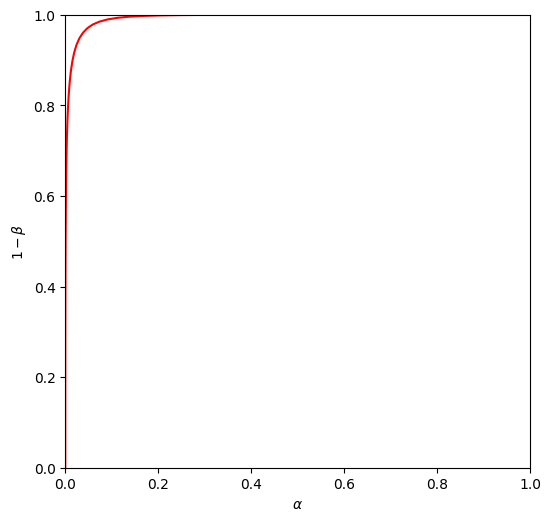

In [3]:
plt.figure(figsize=(6,6),dpi=100)
x_cuts = np.linspace(*xrange,100)
alphas = 1-pdf_0.cdf(x_cuts)
betas = pdf_1.cdf(x_cuts)
plt.plot(alphas,1-betas, color='red')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$1-\beta$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Se le distribuzioni $f(x|H_0)$ e $f(x|H_1)$ sono più sovrapposte, daranno luogo ad una ROC curve peggiore. 

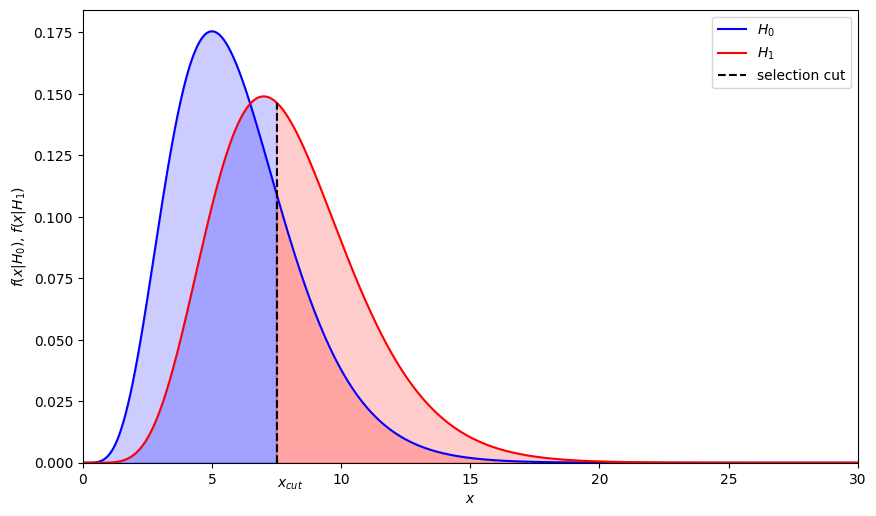

In [2]:
pdf_0 = gamma(6)
pdf_1 = gamma(8)
xrange=(0,30)
x = np.linspace(*xrange,1000)
x_cut = 7.5
y_cut = max(pdf_0.pdf(x_cut),pdf_1.pdf(x_cut))
plt.figure(figsize=(10,6),dpi=100)
plt.plot(x,pdf_0.pdf(x), color='b', label='$H_0$')
plt.plot(x,pdf_1.pdf(x), color='r', label='$H_1$')
plt.plot([x_cut,x_cut],[0,y_cut], color='black', linestyle='--', label='selection cut')
x_lo = x[x<x_cut]
x_hi = x[x>=x_cut]
plt.fill_between(x_lo,pdf_0.pdf(x_lo), color='b', alpha=0.2)
plt.fill_between(x_lo,pdf_1.pdf(x_lo), color='b', alpha=0.2)
plt.fill_between(x_hi,pdf_0.pdf(x_hi), color='r', alpha=0.2)
plt.fill_between(x_hi,pdf_1.pdf(x_hi), color='r', alpha=0.2)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x|H_0)$, $f(x|H_1)$')
plt.text(x_cut, -0.01, '$x_{cut}$')
plt.xlim(*xrange)
plt.ylim(0)
plt.show()

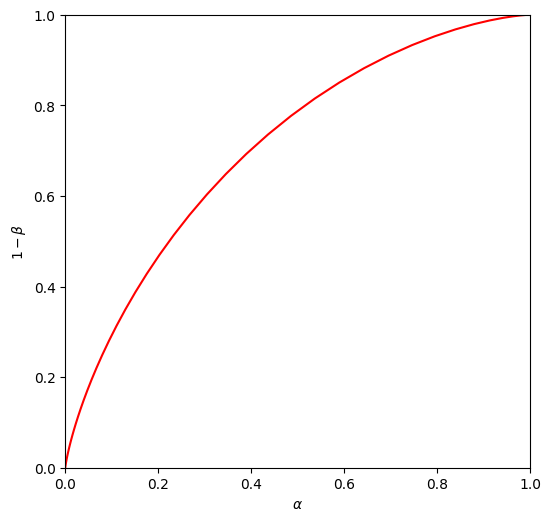

In [3]:
x_cuts = np.linspace(*xrange,100)
alphas = 1-pdf_0.cdf(x_cuts)
betas = pdf_1.cdf(x_cuts)
plt.figure(figsize=(6,6),dpi=100)
plt.plot(alphas,1-betas, color='red')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$1-\beta$')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## Scelta del test statistic

In generale, abbiamo a disposizione un campione di $n$ variabili, $x_1,\cdots,x_n$, e non sarà ovvio trovare un criterio di selezione ad $n$ dimensioni, come invece è il caso ad una dimensione.

Il problema di selezionare una delle due ipotesi consisterà nella scelta di un *test statistic* $t$ che è funzione del campione:

$t= t(x_1,\cdots,x_n)$

In questo caso parliamo di problema **multivariato**.

La selezione consisterà, nel caso più semplice, nella scelta di un valore di soglia $t_{\mathrm{cut}}$ per cui si sceglierà $H_0$ o $H_1$ a seconda se il valore calcolato per il campione osservato $t_{\mathrm{obs}}$ sia minore o maggiore del valore di soglia.

Alcuni esempi possono essere:

* $t = x_1$ : scelgo solo una delle variabili per la selezione, ed ignoro le altre. In questo modo però l'informazione contenuta nelle variabili $x_2,\cdots,x_n$ viene ignorata.
* $t = \alpha_1 x_1+\cdots+\alpha_n x_n$ : uso una combinazione lineare delle variabili per la selezione. Esiste un algoritmo per ottimizzare la scelta dei coefficienti $\alpha_i$ ([discriminante di Fisher](https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture8.pdf)), ma anche questo metodo non sempre fornisce risultati ottimali.

## Lemma di Neyman-Pearson

La prestazione di un criterio di selezione può essere considerata ottimale se raggiunge la minima probabilità di errore di identificazione $\beta$ per un valore desiderato di $\alpha$. Secondo il lemma di Neyman-Pearson, il *test statistic* ottimale, per questo scopo, è:

$\displaystyle \lambda(x_1,\cdots, x_n) = \frac{p(x_1,\cdots,x_n|H_1)}{p(x_1,\cdots,x_n|H_0)}$

Valori grandi di $\lambda$ indicheranno che l'ipotesi $H_1$ è *favorita* nel rapporto rispetto ad $H_0$.

La selezione da stabilire è:

$\displaystyle \lambda(x_1,\cdots, x_n) = \frac{p(x_1,\cdots,x_n|H_1)}{p(x_1,\cdots,x_n|H_0)}\ge k_\alpha$

dove $k_\alpha$ è stabilito in modo da ottenere il valore di $\alpha$ voluto.

## Applicazione alle PDF gamma considerate sopra
Nel caso osservato prima, il rapporto delle funzioni di verosimiglianza è binuivocamente legato ad $x$. Seezionare su $\lambda$, quindi, equivale a selezionare su $x$. Il motivo è la distribuzione regolare delle due PDF con picchi ben separati.

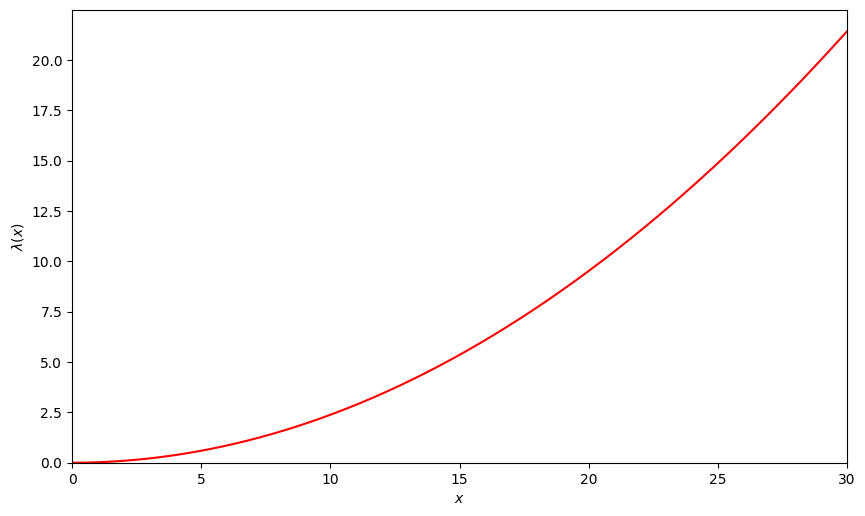

In [4]:
# skip first point x=0
x = np.linspace(*xrange,1000)[1:]
lik_ratio = pdf_1.pdf(x)/pdf_0.pdf(x) 
plt.figure(figsize=(10,6),dpi=100)
plt.plot(x, lik_ratio, color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\lambda(x)$')
plt.xlim(*xrange)
plt.ylim(0)
plt.show()

Non è detto che l'andamento del rapporto di verosimiglianza $\lambda$ sia una funzione crescente o decrescente rispetto a $x$. L'esempio seguente è una dimostrazione.

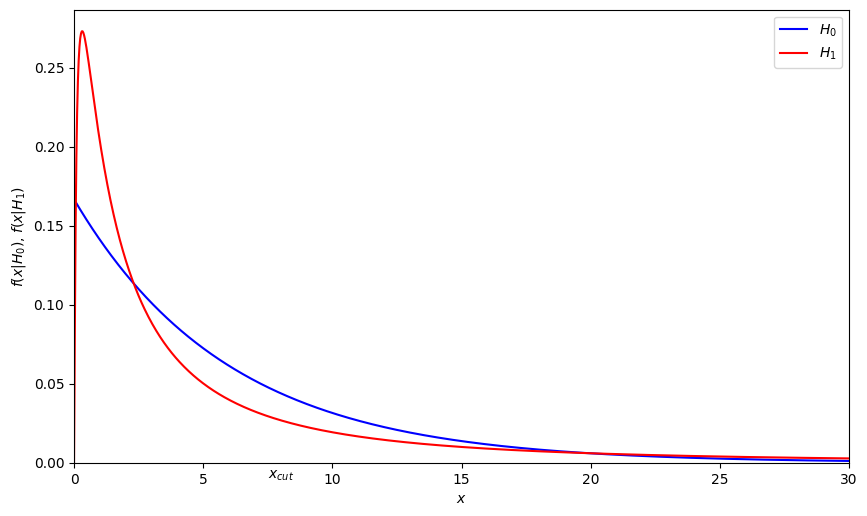

In [5]:
from scipy.stats import lognorm
from scipy.stats import expon
pdf_1 = lognorm(1.5,scale=3)
pdf_0 = expon(scale=6)
xrange=(0,30)
x = np.linspace(*xrange,1000)
plt.figure(figsize=(10,6),dpi=100)
plt.plot(x,pdf_0.pdf(x), color='b', label='$H_0$')
plt.plot(x,pdf_1.pdf(x), color='r', label='$H_1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x|H_0)$, $f(x|H_1)$')
plt.text(x_cut, -0.01, '$x_{cut}$')
plt.xlim(*xrange)
plt.ylim(0)
plt.show()

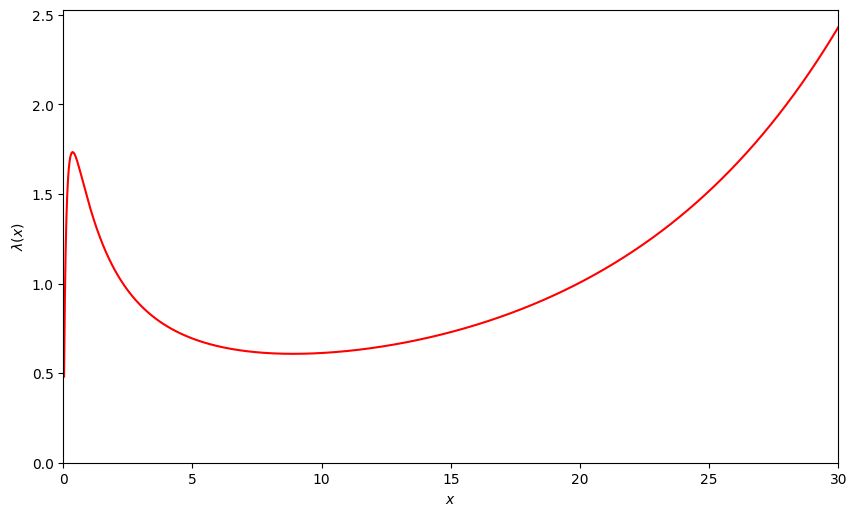

In [6]:
x = np.linspace(*xrange,1000)[1:]
lik_ratio = pdf_1.pdf(x)/pdf_0.pdf(x) 
plt.figure(figsize=(10,6),dpi=100)
plt.plot(x, lik_ratio, color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$\lambda(x)$')
plt.xlim(*xrange)
plt.ylim(0)
plt.show()

## Applicazione a PDF multidimensionali

Nel caso di distribuzione multidimensionale (o *multivariato*), non è ovvio trovare $\lambda(x_1,\cdots,x_n)$ in maniera esatta. Selezionare $H_0$ o $H_1$ in base al valore di $\lambda$, in generale, non equivale ad una selezione banale nello spazio $x_1,\cdots,x_n$.

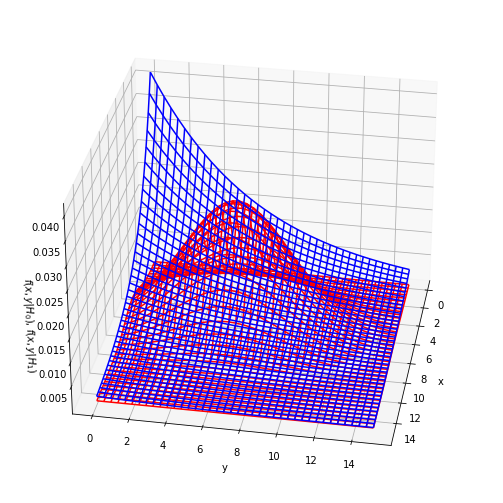

In [7]:
from scipy.stats import norm
from scipy.stats import expon
from mpl_toolkits import mplot3d
from matplotlib import cm
pdf1x, pdf1y = norm(6, 2), norm(6, 3)
def f1(x, y):
    return pdf1x.pdf(x)*pdf1y.pdf(y)
pdf0x, pdf0y = expon(scale=4), expon(scale=6)
def f0(x, y):
    return pdf0x.pdf(x)*pdf0y.pdf(y)
x_p = np.linspace(0, 15, 40)
y_p = np.linspace(0, 15, 40)
x, y = np.meshgrid(x_p, y_p)
z0 = f0(x, y)
z1 = f1(x, y)
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, y, z0, color='blue')
ax.plot_wireframe(x, y, z1, color='red')
ax.view_init(30, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$f(x,y|H_0)$, $f(x,y|H_1)$')
plt.show()

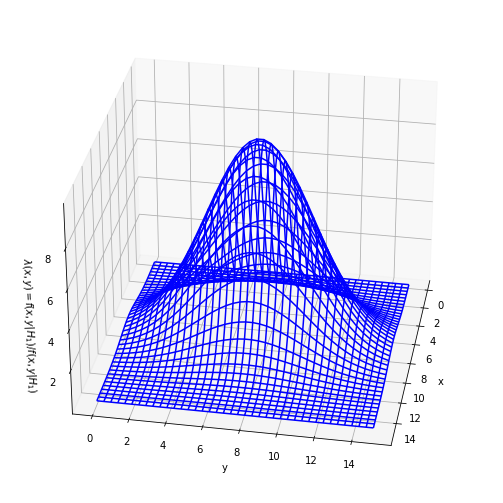

In [8]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
lr = z1/z0
ax.plot_wireframe(x, y, lr, color='blue')
ax.view_init(30, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\lambda(x,y) = f(x,y|H_1)/f(x,y|H_1)$')
plt.show()

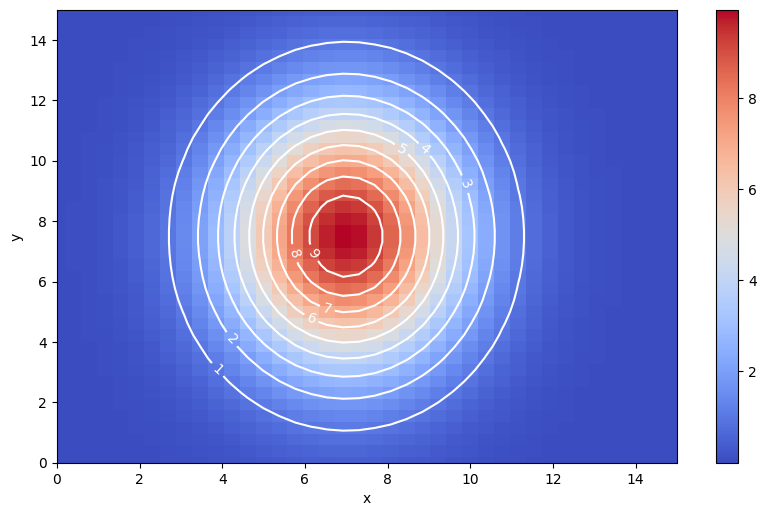

In [10]:
figure, ax = plt.subplots(figsize=(10,6), dpi=100)
col = ax.pcolormesh(x, y, lr, cmap=cm.coolwarm, vmin=lr.min(), vmax=lr.max(), shading='auto')
con = ax.contour(x, y, lr, np.arange(0, 20, 1), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

Applicare una selezione sul rapporto di verosimiglianza $\lambda$ equivale, quindi, a selezionare i valori dentro uno dei controrni mostrati nella figura sopra.

Nel caso sopra la PDF in due dimensioni era nota per costruzione. In genere è molto raro trovarsi in queste condizioni e nella pratica, è molto difficile trovare una determinazione esatta di $\lambda(x_1,\cdots, x_n)$.

## Campioni discreti

In gran parte dei casi non si disponde della distribuzione di probabilità, ma di un campione che può essere o di dati reali oppure simulati con tecniche Monte Carlo.

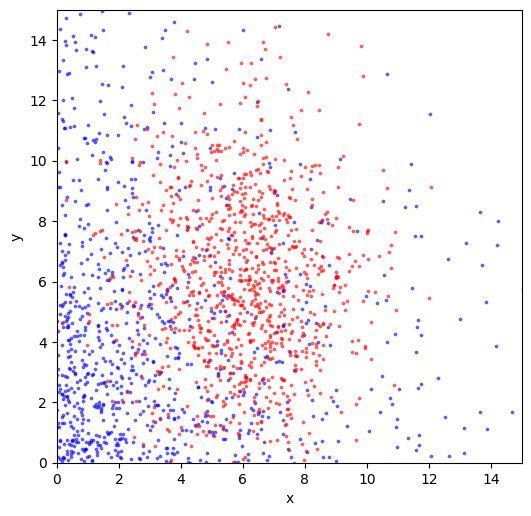

In [11]:
n0, n1 = 1000, 1000
x0_seq, y0_seq = pdf0x.rvs(size=n0), pdf0y.rvs(size=n0)
x1_seq, y1_seq = pdf1x.rvs(size=n1), pdf1y.rvs(size=n1)
figure, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.scatter(x0_seq, y0_seq, alpha=0.5, s=3, color='blue')
ax.scatter(x1_seq, y1_seq, alpha=0.5, s=3, color='red')
ax.clabel(con, inline=1, fontsize=10)
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

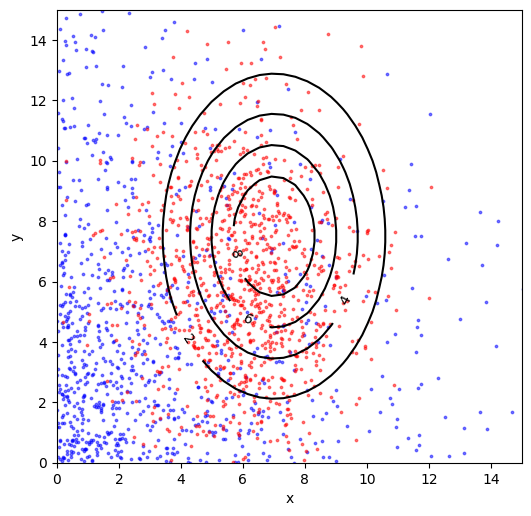

In [12]:
figure, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.scatter(x0_seq, y0_seq, alpha=0.5, s=3, color='blue')
ax.scatter(x1_seq, y1_seq, alpha=0.5, s=3, color='red')
con = ax.contour(x, y, lr, np.arange(0, 20, 2), colors='black')
ax.clabel(con, inline=1, fontsize=10)
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Algoritmi approssimati
Diversi algoritmi sono stati sviluppati per ottenere un'approssimazione quanti più vicina a questo valore ottimale.

Tra questi:

### Funzione di verosimiglianza proiettiva

Si approssima la PDF al prodotto delle PDF marginali in ciascuna variabile, ossia alle proiezioni della PDF su di queste. Ad esempio, PDF si possono determinare interpolando gli istrogrammi 1-dimensionali per ciascuna variabile ($x$ e $y$) in ciascuna ipotesi ($H_0$ e $H_1$).

La PDF è realmente fattorizzata solo se si assume che le variabili siani indipendenti. Altrimenti questo metodo costituirà solo un'approssimazione.

Prima di effettuare la proiezione, quindi la fattorizzazione, si può effettuare una rotazione delle variabili in modo da usare come nuove variabili gli autovettori della matrice di covarianza. In questo modo, si può almeno eliminare la correlazione tra le variabili, e ci si può avvicinare maggiormante ad una situazione in cui le variabili sono indipendenti. Abbiamo però già osservato che variabili scorrelate non sono necessariamente indipendenti.

L'eliminazione della correlazione in un campione di misure e l'ordinamento delle stesse in base agli autovalori della matrice di correlazione prende il nome di [*Principal Component Analysis*](https://www.lorenzogovoni.com/pca/) o PCA.

### Approssimazione da campioni discreti
Per unna determinazione approssimativa delle PDF dai campioni discretia abbiamo già visto il metodo della *kernel density* che si può usare anche in più dimensioni.

## Algoritmi più avanzati

I più recenti e prestanti algoritmi sono quelli di *machine learning*.
